In [1]:
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST-1946093440-res/'
p = pd.read_csv(output_path + 'ST-1946093440_1.0.csv')

p.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure',
       'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'work_time', 'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

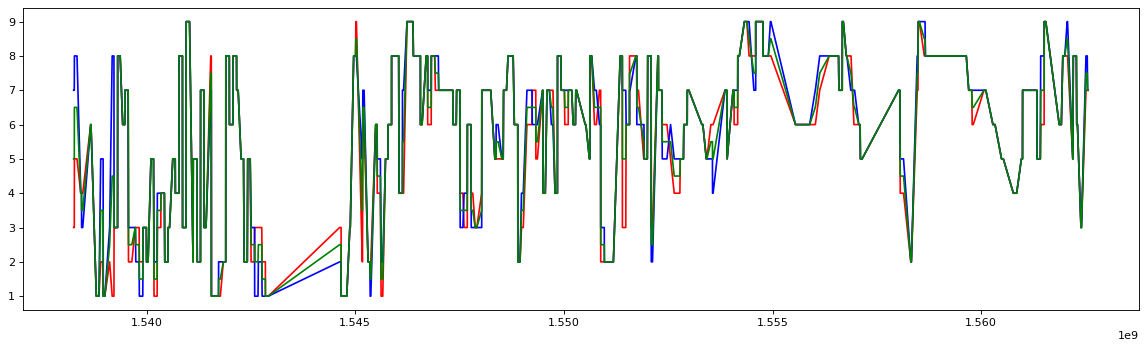

In [2]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [4]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [6]:
# drop zeros 
p = p.drop(['work_time'], axis=1)

In [7]:
train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [8]:
X_train = train_set.loc[:,'accX':'day_sleep']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'day_sleep']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [9]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,alc,cig,mood,tense,tired,rumination,socialize,socialize_val,sport_time,day_sleep
18177,-8.99,0.03,-0.37,0.03,3.93,0.03,-0.05,0.10,-0.06,0.10,...,0,2,4.0,4,2.0,2,35,20,70,0
72051,-2.21,3.45,-7.31,3.57,2.51,3.57,1.31,86.13,1.74,57.28,...,0,2,5.0,5,2.0,7,46,20,0,0
21741,1.03,0.29,5.10,1.28,-8.15,1.28,-0.07,6.18,-0.04,2.84,...,0,2,7.0,7,5.0,2,32,62,70,0
11923,-9.64,0.03,-0.08,0.03,1.55,0.03,-0.06,0.09,-0.05,0.09,...,0,2,7.0,5,3.0,5,43,57,70,0
16567,-9.67,0.03,-0.74,0.03,-0.24,0.03,-0.04,0.10,-0.05,0.14,...,0,2,3.5,3,2.5,3,28,17,0,0


In [10]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred_1 = rnd_reg.predict(X_train)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.5697206072007881

In [13]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

3.1858952729257295

In [14]:

forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [0.57753504 0.57217212 0.56614745 0.58299579 0.55823972 0.57741784
 0.56425603 0.56675197 0.59088931 0.55538166]
Mean: 0.571178693533848
std dev: 0.010574805698315246
